Cilj je u 2D-u predstaviti putanju bespilotne letelice od pocetnog stanja O, do krajnje pozicije T. Ulaz je brzina letelice i ugao kretanja, a tau_v i tau_theta nam predstavljaju vremenske parametre

In [15]:
import numpy as np

In [16]:
from scipy.integrate import odeint #za resavanje diferencijalnih jednacina

In [17]:
from matplotlib import pyplot as plt

In [42]:
tau_v=5.0 #vremensko kasnjenje za brzinu
tau_theta=2.0 #vremensko kasnjenje za ugao
v_c= 5.0 #brzina
theta_c = np.pi / 4 #ugao 

In [43]:
#poziciju same letelice odredjujemo preko formula
# x = v * cos(theta)
# y = v * sin(theta)

In [44]:
def model(state, t):       #state sadrzi trenutno stanje UAV-a tj [x,y,v,theta]
    x,y,v,theta = state
    v_dot = (v_c - v) / tau_v   #v_dot je promena brzine u vremenu
    theta_dot = (theta_c - theta) / tau_theta
    x_dot = v * np.cos(theta)
    y_dot = v * np.sin(theta)
    return [x_dot, y_dot, v_dot, theta_dot]

In [45]:
initial_state = [0.0, 0.0, 0.0, 0.0]

In [46]:
t= np.linspace(0,50,500)

In [47]:
#funkcija za resavanje sistema diferencijalnih jednacina, koje ovde opisuju kako se menja stanje sistema tokom vremena
solution = odeint(model, initial_state,  t)

In [48]:
x= solution[:, 0]
y= solution[:, 1]
v= solution[:, 2]
theta= solution[:, 3]

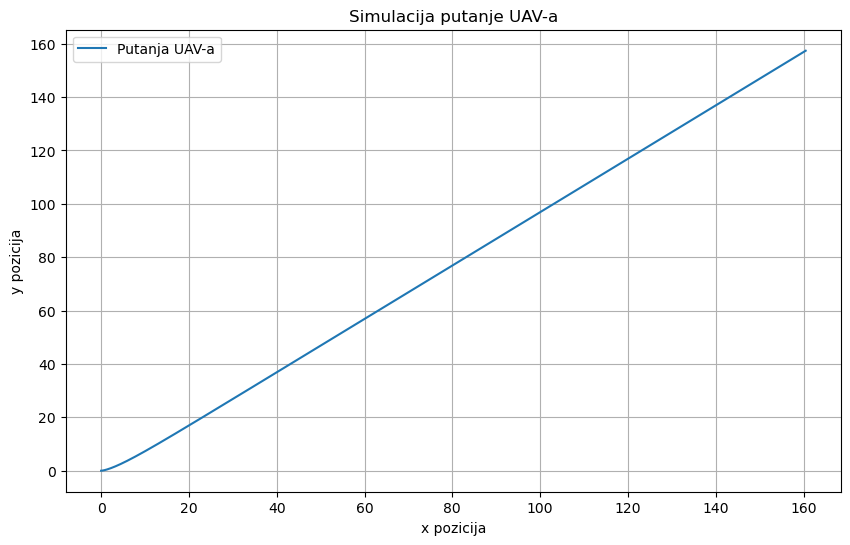

In [49]:
plt.figure(figsize=(10,6))
plt.plot(x,y,label='Putanja UAV-a')
plt.xlabel('x pozicija')
plt.ylabel('y pozicija')
plt.title('Simulacija putanje UAV-a')
plt.legend()
plt.grid(True)
plt.show()